In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools import job_monitor
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

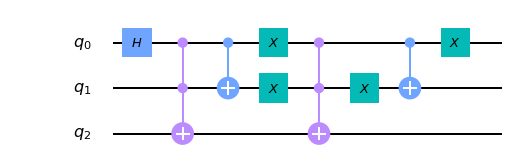

In [3]:
c = QuantumCircuit(3)

c.h(0)
# increment
c.ccx(0, 1, 2)
c.cx(0, 1)

# decrement
c.x(0)
c.x(1)
c.ccx(0, 1, 2)
c.x(1)
c.cx(0, 1)
c.x(0)

step = c.to_gate()
c.draw()

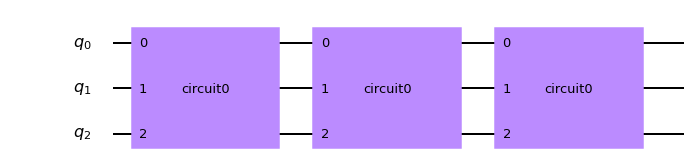

In [4]:
qr = QuantumRegister(3, 'q')
c = QuantumCircuit(qr)
c.append(step, [qr[0], qr[1], qr[2]])
c.append(step, [qr[0], qr[1], qr[2]])
c.append(step, [qr[0], qr[1], qr[2]])
c.draw()

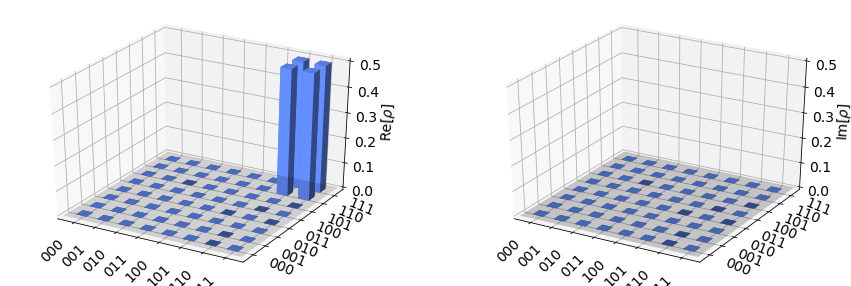

In [24]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(c, simulator).result()
statevector = result.get_statevector(c)
plot_state_city(statevector)

Kubity pozycji po trzech krokach przyjmują wartości 11 zawsze - obliczenia były prawidłowe.

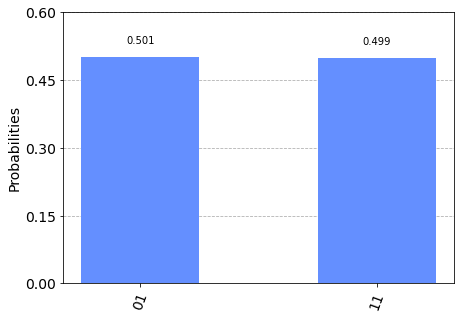

In [25]:
simulator = Aer.get_backend('qasm_simulator')

c1 = QuantumCircuit(3, 3)
c1.append(step, [0, 1, 2])
c1.measure([1, 2], [1, 2])

result = execute(c1, simulator).result()
counts = result.get_counts(c1)

def remove_last_char_in_dict(d):
    return dict([(k[:-1], v) for k, v in d.items()])

plot_histogram(remove_last_char_in_dict(counts))

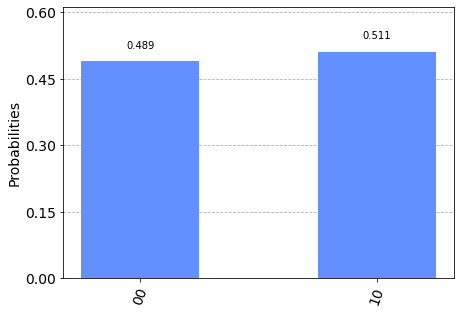

In [26]:
c2 = QuantumCircuit(3, 3)
c2.append(step, [0, 1, 2])
c2.append(step, [0, 1, 2])
c2.measure([1, 2], [1, 2])

result = execute(c2, simulator).result()
counts = result.get_counts(c2)
plot_histogram(remove_last_char_in_dict(counts))

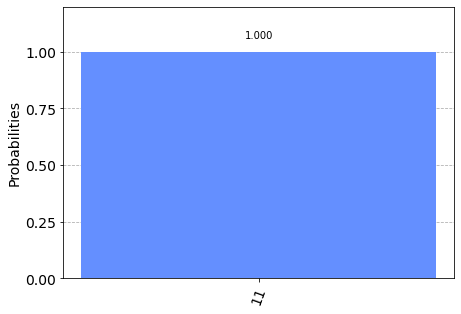

In [27]:
c3 = QuantumCircuit(3, 3)
c3.append(step, [0, 1, 2])
c3.append(step, [0, 1, 2])
c3.append(step, [0, 1, 2])
c3.measure([1, 2], [1, 2])

simulator = Aer.get_backend('qasm_simulator')
data = execute(c3, simulator).result().get_counts()
plot_histogram(remove_last_char_in_dict(data))

In [28]:
simulator = provider.get_backend('ibmq_rome')
job = execute(c1, simulator)
job_monitor(job)

Job Status: job has successfully run


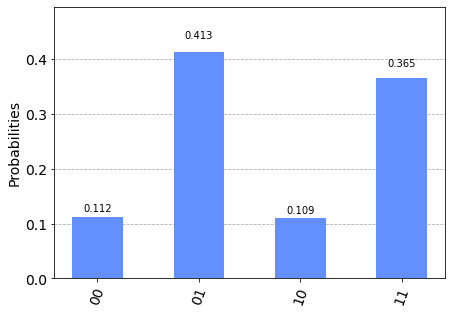

In [29]:
plot_histogram(remove_last_char_in_dict(job.result().get_counts()))

Dla jednego kroku wyniki są zgrubsza podobne do oczekiwanych.

In [30]:
job = execute(c2, simulator)
job_monitor(job)

Job Status: job has successfully run


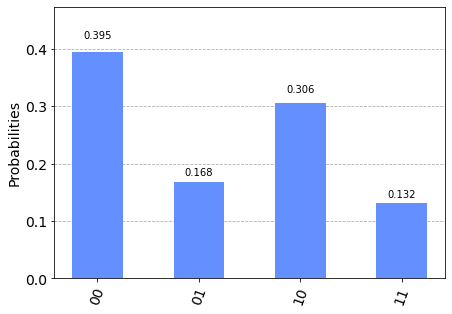

In [31]:
plot_histogram(remove_last_char_in_dict(job.result().get_counts()))

Dla dwóch kroków, prawidłowe wyniki są na czele, widać trochę większe odstępstwa.

In [32]:
job = execute(c3, simulator)
job_monitor(job)

Job Status: job has successfully run


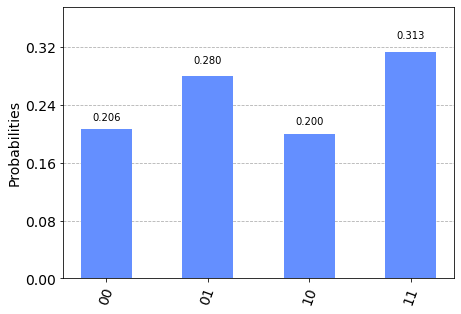

In [33]:
plot_histogram(remove_last_char_in_dict(job.result().get_counts()))

Dla 3 kroków wyniki są znacznie zaburzone - prawdiłowy wynik (11) wciąż prowadzi, ale jest tylko nieznacznie bardziej prawdopodobny od wyników błędnych.